## 1. 필요한 모듈 임포트

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [ ]:
BATCH_SIZE =
EPOCHS =
DEVICE = 'cuda'
LR =

## 2. Load dataset
- 데이터세트 다운로드
- 데이터세트 정보
- 예시

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:10<00:00, 901kB/s] 


Extracting ../data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 133kB/s]


Extracting ../data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.26MB/s]


Extracting ../data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.28MB/s]


Extracting ../data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


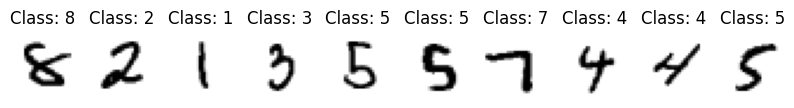

In [ ]:
train_dataset = datasets.MNIST(root = "../data/MNIST",
                               train = ,
                               download = True,
                               transform = transforms.ToTensor())

test_dataset = datasets.MNIST(root = "../data/MNIST",
                              train = ,
                              transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = )

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = )

for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize)) #10개 plot하기 위한 figure 크기 설정

for i in range(10):
    plt.subplot(1, 10, i + 1) # plot.subplot(rows, columns, index)
    plt.axis('off')
    plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap = "gray_r")
    plt.title('Class: ' + str(y_train[i].item()))

## 3-1. 인공지능 신경망 (MLP)


```
nn.Linear(in_channels, out_channels)
```


```
F.sigmoid()
F.relu()
```


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28,  ) # 28x28 고정
        self.fc2 = nn.Linear(   ,    )
        self.fc3 = nn.Linear(   , 10) # 10 고정

    def forward(self,x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = F.sigmoid(x)

        x = self.fc2(x)
        x = F.sigmoid(x)

        x = self.fc3(x)
        return x

model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=LR, momentum=0.5)
criterion = nn.CrossEntropyLoss()

## 3-2. 인공지능 신경망(CNN)

```
# 가로 세로 크기 유지
nn.Conv2d(in_channels, out_channels, kernel_size = 3, padding = 1, stride = 1)
nn.Conv2d(in_channels, out_channels, kernel_size = 5, padding = 2, stride = 1)
nn.Conv2d(in_channels, out_channels, kernel_size=7, padding=3, stride=1)
```

```
# 가로 세로 크기 반으로 줄어듦
ex : (32, 32) -> (16, 16)
nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, stride=2)
nn.Conv2d(in_channels, out_channels, kernel_size=5, padding=2, stride=2)
nn.Conv2d(in_channels, out_channels, kernel_size=1, padding=0, stride=2)
```

```
# 가로 세로 크기 줄이는 방법 (Pooling)
# 크기가 1/s 배 됨
# Ex : s = 2이면 (32, 32) -> (16, 16)
nn.MaxPool2d(kernel_size=s, stride=s)
nn.AvgPool2d(kernel_size=s, stride=s)
```

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolutional Block 1: Conv2d -> ReLU -> BatchNorm
        self.conv1 = nn.Conv2d(1, 32, kernel_size= , stride=  , padding=  )
        self.bn1 = nn.BatchNorm2d(32)

        # Convolutional Block 2: Conv2d -> ReLU -> BatchNorm
        self.conv2 = nn.Conv2d(32,   , kernel_size=  , stride=  , padding=  )
        self.bn2 = nn.BatchNorm2d(  )

        # MaxPooling Layer
        self.pool = nn.MaxPool2d(kernel_size= , stride= )

        # Fully Connected Layers
        self.fc1 = nn.Linear( *  *  *  ,    )  # Flattened input
        self.fc2 = nn.Linear(    , 10)  # 10 (class labels)


    def forward(self, x):
        # Convolutional Block 1
        x = self.conv1(x)
        x = F.relu(x)
        x = self.bn1(x)

        # Convolutional Block 2
        x = self.conv2(x)
        x = F.relu(x)
        x = self.bn2(x)

        # MaxPooling
        x = self.pool(x)

        # Flatten
        x = x.view(x.size(0), -1)

        # Fully Connected Layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  # Output layer (no activation for logits)
        return x


model = CNN().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=LR, momentum=0.5)
criterion = nn.CrossEntropyLoss()

## 4. 학습 / 검증 함수

In [ ]:
# 학습 기록 저장을 위한 리스트
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

def train(model, train_loader, optimizer, epoch, log_interval=10):
    model.train()
    correct = 0
    running_loss = 0
    total = 0

    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        total += label.size(0)
        prediction = output.max(1, keepdim=True)[1]
        correct += prediction.eq(label.view_as(prediction)).sum().item()

        if batch_idx % log_interval == 0:
            print("Train epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image),
                len(train_loader.dataset), 100. * batch_idx / len(train_loader),
                loss.item()))

    # 에포크 단위로 평균 손실 및 정확도 계산
    avg_loss = running_loss / len(train_loader)
    accuracy = 100. * correct / total
    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)


def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim=True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()

    test_loss /= (len(test_loader.dataset) / BATCH_SIZE)
    accuracy = 100. * correct / len(test_loader.dataset)
    test_losses.append(test_loss)
    test_accuracies.append(accuracy)
    return test_loss, accuracy



## 5. 학습 반복문

In [ ]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, epoch, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n".format(
        epoch, test_loss, test_accuracy))

Train epoch: 1 [0/60000 (0%)]	Train Loss: 2.348852
Train epoch: 1 [6400/60000 (11%)]	Train Loss: 0.097098
Train epoch: 1 [12800/60000 (21%)]	Train Loss: 0.050378
Train epoch: 1 [19200/60000 (32%)]	Train Loss: 0.163431
Train epoch: 1 [25600/60000 (43%)]	Train Loss: 0.009887
Train epoch: 1 [32000/60000 (53%)]	Train Loss: 0.087610
Train epoch: 1 [38400/60000 (64%)]	Train Loss: 0.006796
Train epoch: 1 [44800/60000 (75%)]	Train Loss: 0.021902
Train epoch: 1 [51200/60000 (85%)]	Train Loss: 0.009694
Train epoch: 1 [57600/60000 (96%)]	Train Loss: 0.001636

[EPOCH: 1], 	Test Loss: 0.0423, 	Test Accuracy: 98.63 %

Train epoch: 2 [0/60000 (0%)]	Train Loss: 0.002696
Train epoch: 2 [6400/60000 (11%)]	Train Loss: 0.061957
Train epoch: 2 [12800/60000 (21%)]	Train Loss: 0.001909
Train epoch: 2 [19200/60000 (32%)]	Train Loss: 0.011609
Train epoch: 2 [25600/60000 (43%)]	Train Loss: 0.020907
Train epoch: 2 [32000/60000 (53%)]	Train Loss: 0.000494
Train epoch: 2 [38400/60000 (64%)]	Train Loss: 0.006761
Tr

## 6. 시각화

ValueError: x and y must have same first dimension, but have shapes (10,) and (20,)

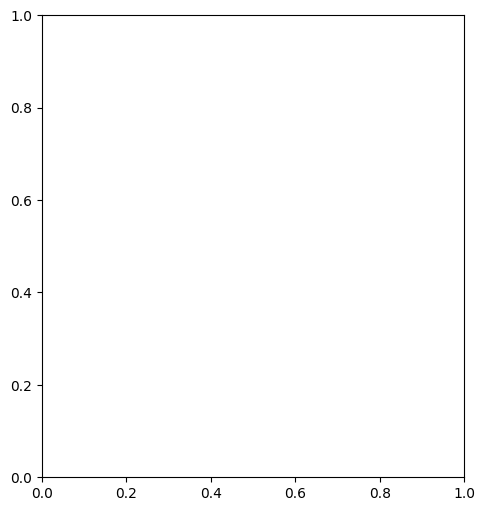

In [ ]:

# 학습 결과 시각화
epochs = range(1, EPOCHS + 1)

plt.figure(figsize=(12, 6))

# Train/Test Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Train/Test Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()